https://discourse.pymc.io/t/using-stick-breaking-algorithm-example-but-receiving-gradient-problem/888

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from theano import shared
import theano.tensor as tt
import pandas as pd
%pylab inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
with pm.Model() as model:
    # "continuous" part : lognormal mixture
    ln_nbr = 5
    mu = pm.Exponential('mu', lam=1, shape=ln_nbr)
    sd = pm.HalfNormal('sd', sd=1, shape=ln_nbr)
    ln_components = pm.Lognormal.dist(mu=mu,sd=sd,shape=ln_nbr)
    ln_w = pm.Dirichlet('ln_w',a=np.array([0.0000001]*ln_nbr))
    ln_mix = pm.Mixture.dist(w=ln_w,comp_dists=ln_components, shape=10)

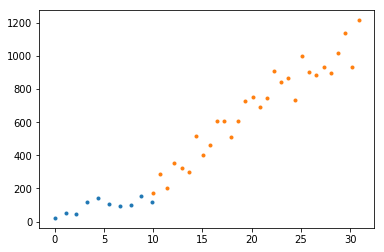

In [2]:
x1 = np.linspace(0., 9.9, 10) 
x2 = np.linspace(10., 30.9, 30)
x = np.concatenate((x1, x2), axis = 0)

y1 = 10.*x1 + 5 + np.random.ranf(x1.size)*100.
y2 = y1[-1:] + 40.*x2 + -40.*x2[0] + np.random.ranf(x2.size)*300.
y = np.concatenate((y1, y2), axis = 0)

plt.plot(x1, y1, linestyle = 'None', marker = '.')
plt.plot(x2, y2, linestyle = 'None', marker = '.');

In [5]:
x

array([[ 0.        ],
       [ 1.1       ],
       [ 2.2       ],
       [ 3.3       ],
       [ 4.4       ],
       [ 5.5       ],
       [ 6.6       ],
       [ 7.7       ],
       [ 8.8       ],
       [ 9.9       ],
       [10.        ],
       [10.72068966],
       [11.44137931],
       [12.16206897],
       [12.88275862],
       [13.60344828],
       [14.32413793],
       [15.04482759],
       [15.76551724],
       [16.4862069 ],
       [17.20689655],
       [17.92758621],
       [18.64827586],
       [19.36896552],
       [20.08965517],
       [20.81034483],
       [21.53103448],
       [22.25172414],
       [22.97241379],
       [23.69310345],
       [24.4137931 ],
       [25.13448276],
       [25.85517241],
       [26.57586207],
       [27.29655172],
       [28.01724138],
       [28.73793103],
       [29.45862069],
       [30.17931034],
       [30.9       ]])

In [3]:
def norm_cdf(z):
    return 0.5 * (1. + tt.erf(z / tt.sqrt(2.)))

def stick_breaking(v):
    return v * tt.concatenate([tt.ones_like(v[:, :1]), tt.extra_ops.cumprod(1. - v, axis=1)[:, :-1]], axis=1)

x = x[:, np.newaxis]
y = y[:, np.newaxis]
X = shared(x, broadcastable=(False, True))
K = 20

with pm.Model() as model:
    alpha = pm.Normal('alpha', 0., 1., shape=K)
    beta = pm.Normal('beta', 0., 1., shape=K)
    v = norm_cdf(alpha + beta * X)
    w = pm.Deterministic('w', stick_breaking(v))
    
    gamma = pm.Normal('gamma', 0., 10., shape=K)
    delta = pm.Normal('delta', 0., 10., shape=K)
    mu = pm.Deterministic('mu', gamma + delta * X)
    
    tau = pm.Gamma('tau', 1., 1., shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=tau, observed=y)

In [4]:
with model:
    trace = pm.sample(cores=1, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python3.5/dist-packages/theano/tensor/opt.py", line 6780, in local_grad_log_erfc_neg
    if not exp.owner.inputs[0].owner:
AttributeError: 'NoneType' object has no attribute 'owner'

ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/lo

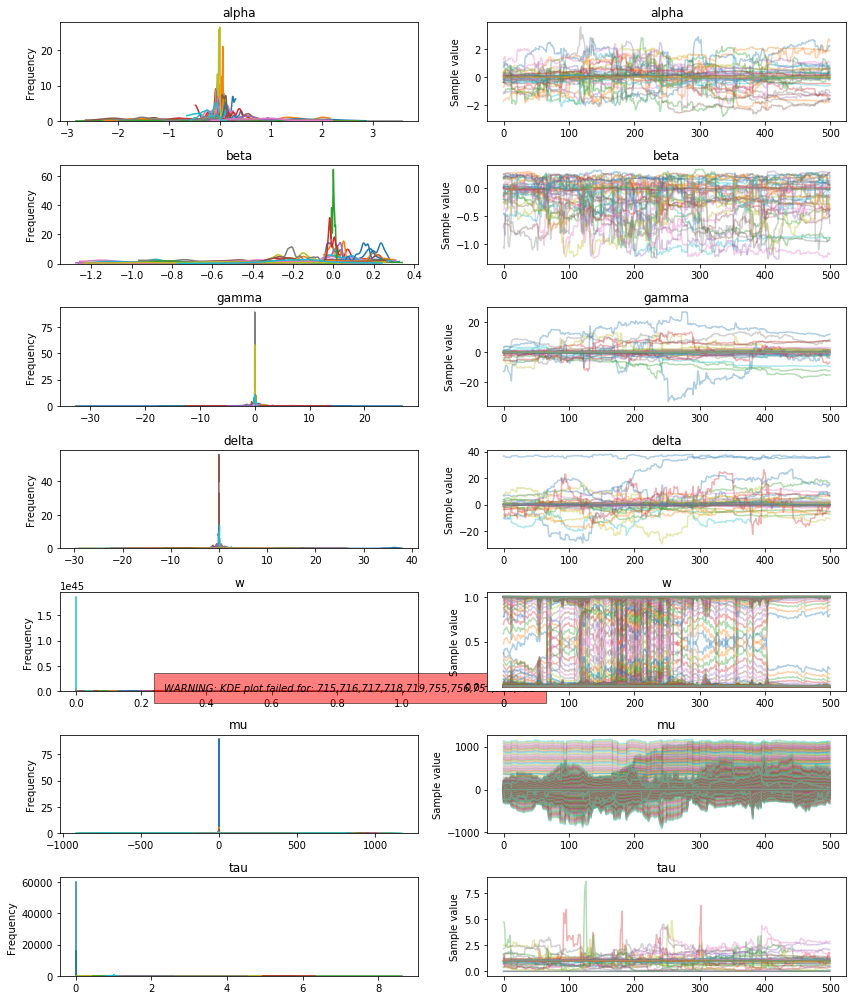

In [10]:
pm.traceplot(trace);

In [44]:
K = 2

with pm.Model() as model:
    alpha = pm.Normal('alpha', 0., 1., shape=K)
    beta = pm.Normal('beta', 0., 1., shape=K)
    v = norm_cdf(alpha + beta * X)
    w = pm.Deterministic('w', stick_breaking(v))
    
    gamma = pm.Normal('gamma', 0., 10., shape=K)
    delta = pm.Normal('delta', 0., 10., shape=K)
    mu = pm.Deterministic('mu', gamma + delta * X)
    
    tau = pm.Gamma('tau', 1., 1., shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=tau, observed=y)
    trace = pm.sample(cores=1, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python3.5/dist-packages/theano/tensor/opt.py", line 6780, in local_grad_log_erfc_neg
    if not exp.owner.inputs[0].owner:
AttributeError: 'NoneType' object has no attribute 'owner'

ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/lo

ValueError: Bad initial energy: inf. The model might be misspecified.

In [45]:
for RV in model.basic_RVs:
    print(RV.name, RV.logp(model.test_point))

alpha -1.8378770664093453
beta -1.8378770664093453
gamma -6.443047252397437
delta -6.443047252397437
tau_log__ -2.0
obs -inf


In [46]:
w.tag.test_value

array([[0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25],
       [0.5 , 0.25]])

In [47]:
mu.tag.test_value

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [48]:
tau.tag.test_value

array([1., 1.])

In [49]:
y.shape

(40, 1)

In [50]:
pm.NormalMixture.dist(w, mu, tau=tau).logp(y).tag.test_value

array([[-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf],
       [-inf]])

In [51]:
pm.NormalMixture.dist([0.75 , 0.25], mu[0], tau=tau).logp(y[0]).tag.test_value

array([[-330.56391631]])

In [52]:
y[0]

array([25.67664222])

In [53]:
K = 2

with pm.Model() as model:
    alpha = pm.Normal('alpha', 0., 1., shape=K)
    beta = pm.Normal('beta', 0., 1., shape=K)
    v = norm_cdf(alpha + beta * X)
    w_ = stick_breaking(v)
    w = pm.Deterministic('w', w_/w_.sum(axis=1, keepdims=True))
    
    gamma = pm.Normal('gamma', 0., 10., shape=K)
    delta = pm.Normal('delta', 0., 10., shape=K)
    mu = pm.Deterministic('mu', gamma + delta * X)
    
    tau = pm.Gamma('tau', 1., 1., shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=tau, observed=y)
    trace = pm.sample(chains=1, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python3.5/dist-packages/theano/tensor/opt.py", line 6780, in local_grad_log_erfc_neg
    if not exp.owner.inputs[0].owner:
AttributeError: 'NoneType' object has no attribute 'owner'

ERROR (theano.gof.opt): Optimization failure due to: local_grad_log_erfc_neg
ERROR (theano.gof.opt): node: Elemwise{true_div,no_inplace}(Elemwise{mul,no_inplace}.0, Elemwise{erfc,no_inplace}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/lo

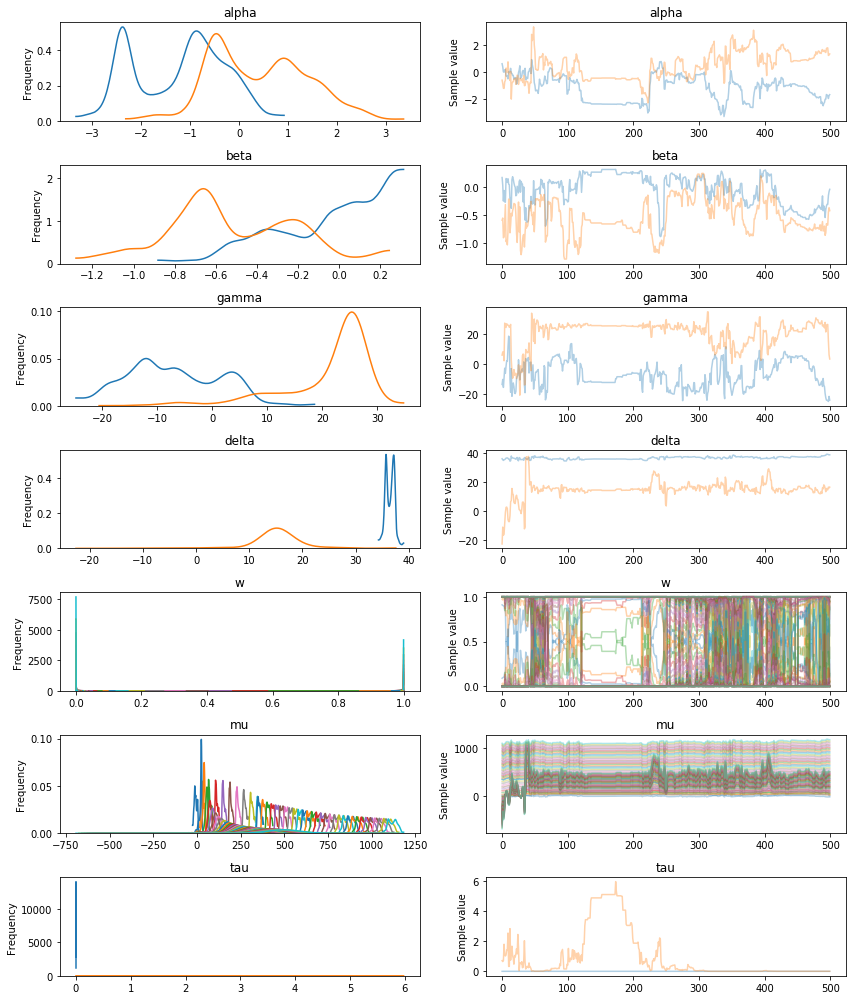

In [54]:
pm.traceplot(trace);